### Polynomial Regression 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# ML models
from sklearn.linear_model import LinearRegression, SGDRegressor
# Transformer Models
from sklearn.preprocessing import StandardScaler
# Metrices
from sklearn.metrics import mean_squared_error, r2_score

linear  y = mx + c

polynomial y = px^n+...+ax^3+bx^2+cx+d

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


#### visualize

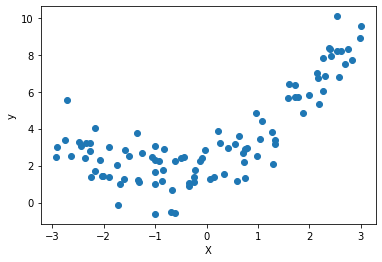

In [4]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
lin_model = LinearRegression()
lin_model.fit(X, y) # training
print("coeff_ =", lin_model.coef_)
print("intercept_ =", lin_model.intercept_)

coeff_ = [[1.03464329]]
intercept_ = [3.51277018]


In [7]:
y_hat = lin_model.predict(X)

In [8]:
error = mean_squared_error(y, y_hat)
acc = r2_score(y, y_hat)

print(f"Erorr: {np.sqrt(error):.2f}")
print(f"Accuracy: {acc:.2f}")

Erorr: 1.71
Accuracy: 0.52


In [11]:
#np.sqrt(((y.mean() - y)**2).sum()/len(y)) # TSS

In [13]:
#r2_score(y, SGDRegressor().fit(X, y).predict(X))

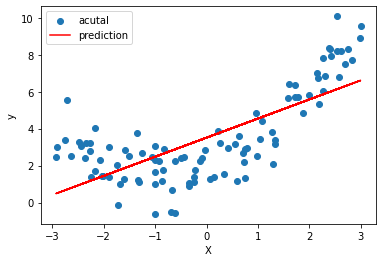

In [15]:
plt.scatter(X, y, label="acutal")
plt.plot(X, y_hat, color='red', label='prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [19]:
X_new = np.c_[X**2, X]

In [20]:
model = LinearRegression()
model.fit(X_new, y)

LinearRegression()

In [21]:
yb = model.predict(X_new)
print(r2_score(y, yb))# Jadu ? 

0.8390337796959404


In [28]:
X_t = np.random.random((100, 1))
X_t_tr = np.c_[X_t**2, X_t]

In [29]:
yp = model.predict(X_t_tr)

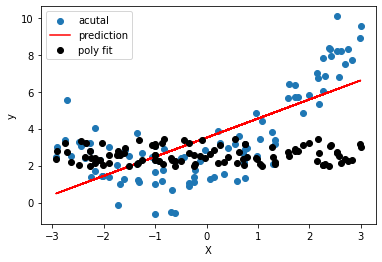

In [31]:
plt.scatter(X, y, label="acutal")
plt.plot(X, y_hat, color='red', label='prediction')
plt.plot(X, yp, 'ok', label="poly fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Polynomial Regression


    we will add high degree of poly features into data set X before fitting data to Linear Model


In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly = PolynomialFeatures(degree=10, include_bias=False)

In [55]:
X_tr = poly.fit_transform(X)

In [56]:
X[:5]

array([[ 0.230705  ],
       [-2.17283344],
       [-0.85855336],
       [-1.57643825],
       [-0.61990531]])

In [57]:
X_tr[:5]

array([[ 2.30705005e-01,  5.32247992e-02,  1.22792275e-02,
         2.83287925e-03,  6.53559420e-04,  1.50779429e-04,
         3.47855689e-05,  8.02520483e-06,  1.85145492e-06,
         4.27139916e-07],
       [-2.17283344e+00,  4.72120518e+00, -1.02583925e+01,
         2.22897783e+01, -4.84319758e+01,  1.05234617e+02,
        -2.28657295e+02,  4.96834218e+02, -1.07953800e+03,
         2.34565628e+03],
       [-8.58553357e-01,  7.37113867e-01, -6.32851585e-01,
         5.43336853e-01, -4.66483679e-01,  4.00501129e-01,
        -3.43851589e-01,  2.95214936e-01, -2.53457774e-01,
         2.17607023e-01],
       [-1.57643825e+00,  2.48515755e+00, -3.91769741e+00,
         6.17600804e+00, -9.73609529e+00,  1.53483530e+01,
        -2.41957307e+01,  3.81430753e+01, -6.01302028e+01,
         9.47915515e+01],
       [-6.19905308e-01,  3.84282591e-01, -2.38218818e-01,
         1.47673110e-01, -9.15433447e-02,  5.67482053e-02,
        -3.51785137e-02,  2.18073474e-02, -1.35184904e-02,
         8.

In [58]:
model = LinearRegression()
model.fit(X_tr, y)

LinearRegression()

In [59]:
y_hat = model.predict(X_tr)


In [60]:
print(r2_score(y, y_hat))

0.8521813831247447


#### Regularization

    Overfitting